#### This is an implementation of perceptron learning algorithm in single layered perceptron 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
x1 = np.array([0., 0., 1., 1.], dtype = np.float32) # . is for simply say that it is a float value 
x2 = np.array([0., 1., 0., 1.], dtype = np.float32) 

y = np.array([0, 0, 0, 1], dtype = int) # For output we do not need any floating points as we are doing this for binary classification which means 0 or 1

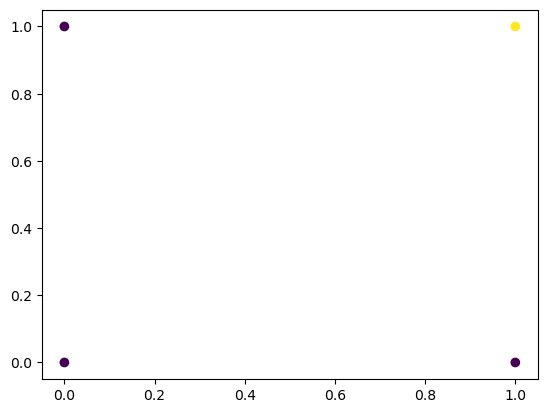

In [4]:
plt.scatter(x1, x2, c=y)


In [5]:
# Repeat the numbers from x1, x2, and y - 50 times to augment the data we have to make understand our infant model well.

x1 = np.repeat(x1, 50)
x2 = np.repeat(x2, 50)
y =  np.repeat(y, 50)

In [6]:
x1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [7]:
x1.shape

(200,)

In [8]:
x2


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [9]:
x2.shape

(200,)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [11]:
# Now let's add some noise so that model will have the clarity that which is wrong and which is right 
x1 = x1 + np.random.rand(x1.shape[0])*0.05  # x1.shape = 200, 
x2 = x2 + np.random.rand(x2.shape[0])*0.05
# We should not add the noise as we have to map our data to exact class 

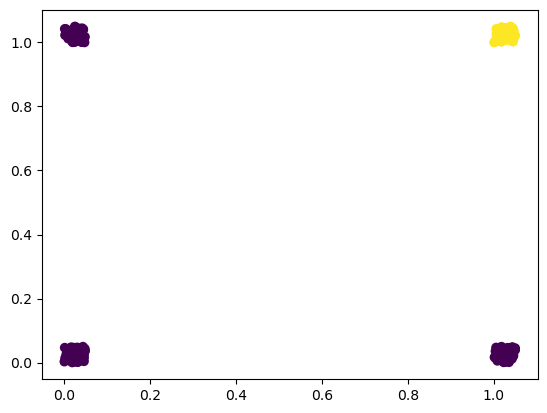

In [12]:
plt.scatter(x1, x2, c=y) 

In [13]:
# combine x1 and x2 

X = np.column_stack((x1, x2))

In [14]:
X

array([[3.18872454e-02, 1.42642331e-03],
       [3.77880278e-02, 2.86626971e-02],
       [4.27886287e-02, 3.08470969e-02],
       [1.29564179e-02, 3.67924293e-02],
       [3.61317527e-02, 1.37723885e-02],
       [3.88182162e-03, 1.49113089e-02],
       [4.60823881e-02, 2.36299251e-02],
       [3.78966443e-02, 6.10283404e-03],
       [1.45861668e-02, 5.33804454e-03],
       [2.74415556e-02, 2.22454546e-02],
       [2.11584763e-02, 1.44434812e-02],
       [1.60781570e-03, 4.66142895e-02],
       [1.29868030e-02, 2.60502196e-02],
       [4.77836656e-02, 3.39891174e-02],
       [2.38661128e-02, 4.65631224e-02],
       [6.85883104e-03, 1.94693038e-02],
       [4.64111544e-02, 4.19655610e-03],
       [1.90472895e-02, 3.88223141e-04],
       [2.09809582e-02, 1.84873226e-02],
       [3.10432558e-02, 4.73111571e-02],
       [5.14712404e-03, 2.57930968e-02],
       [1.65257664e-02, 4.80533350e-02],
       [4.82304171e-02, 4.35170577e-02],
       [2.70665524e-02, 2.54784414e-03],
       [8.126717

In [27]:
print(f"X.shape : {X.shape}")
print(f"y.shape : {y.shape}")


X.shape : (200, 2)
y.shape : (200,)


In [30]:
# It is not good practice to send the data directly without shuffling as there might my any correlation or dependenacy to the indexes so it's better to shuffle now 

#Shuffling

shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(42) # rng = random number generator
shuffle_rng.shuffle(shuffle_idx)

X, y = X[shuffle_idx], y[shuffle_idx]

In [31]:
# Train_Test split - 70% and 30%

X_train, X_test = X[shuffle_idx[:140]], X[shuffle_idx[140:]]
y_train, y_test = y[shuffle_idx[:140]], y[shuffle_idx[140:]]

In [32]:
# Normalization (zero mean, unit variance is 1)

mu, sigma = X_train.mean(axis = 0), X_train.std(axis = 0) # axis = 0 means find the operation along the rows , it it's 1 then along the columsn 
X_train = (X_train-mu)/sigma
X_test = (X_test-mu)/sigma
 

In [ ]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((), dtype=float)
        self.bias = bias
        